1. Check which variables to leave:
    * Contigious data - nulls < 50%
    * from postcodes: state, lat, lon, (regional_cat as both cont and cat) (Done)
    * Not too many subgroups < 20 - script running through a variable:
        + Check amount of columns
        + For each column select distinct
        + If <20 check distribution between groups - bar plot
        + If continuous data - create boxplot
    * Not repeated throughout the set
2. Analyse correlations between variables:
    * covariance matrix (heatmap) - for continuous
    * pearson chi square between categorical/ cramer's v

In [2]:
#%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
import cufflinks as cf
init_notebook_mode(connected=True)
from ggplot import *
from collections import Counter

project_id = "the-d-team-164512"

In [24]:
analyzed_vars = ['CAT_source_system_code', 'CAT_prescription_month', 'CAT_dispense_month', 'CAT_brand_name', 'CAT_form_code', 'CAT_ethical_category', 'CAT_ethical_subcategory', 'CAT_manufacturer_name', 'CAT_atc1code', 'CAT_chronic_illness', 'CAT_adm_method', 'CAT_pat_state', 'CAT_str_state']

First basic grouping/null checks

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 7 rows.

Total time taken 1.8 s.
Finished at 2017-04-26 17:16:17.


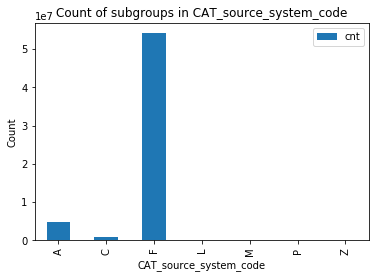

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 12 rows.

Total time taken 2.02 s.
Finished at 2017-04-26 17:16:22.


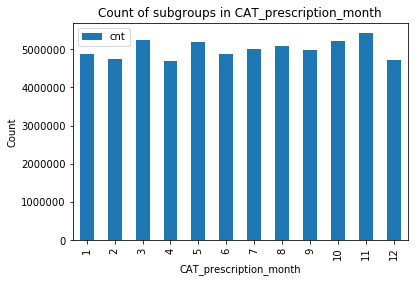

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 12 rows.

Total time taken 1.84 s.
Finished at 2017-04-26 17:16:25.


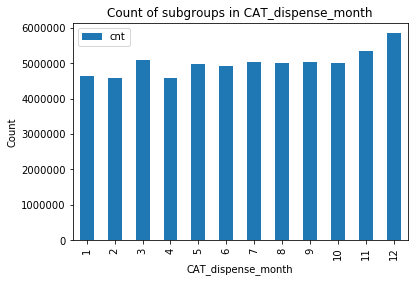

Requesting query... ok.
Query running...
Query done.
Processed: 760.0 Mb

Retrieving results...
Got 4020 rows.

Total time taken 5.06 s.
Finished at 2017-04-26 17:16:32.


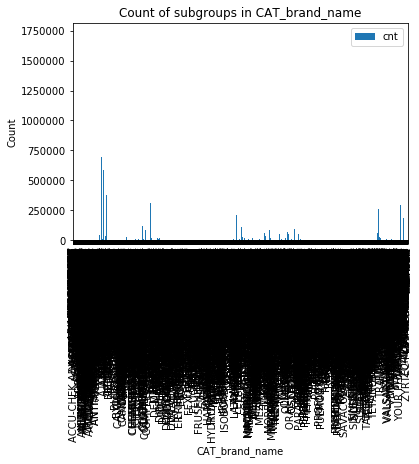

Requesting query... ok.
Query running...
Query done.
Processed: 407.7 Mb

Retrieving results...
Got 128 rows.

Total time taken 3.55 s.
Finished at 2017-04-26 17:17:03.


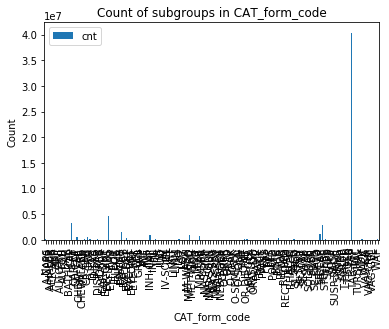

Requesting query... ok.
Query running...
Query done.
Processed: 851.8 Mb

Retrieving results...
Got 5 rows.

Total time taken 3.12 s.
Finished at 2017-04-26 17:17:09.


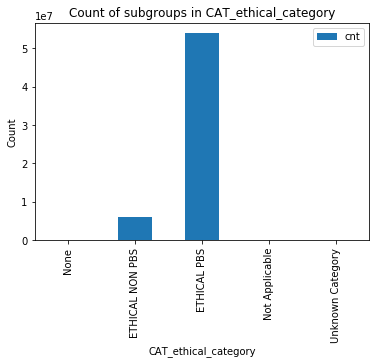

Requesting query... ok.
Query running...
Query done.
Processed: 997.4 Mb

Retrieving results...
Got 9 rows.

Total time taken 3.19 s.
Finished at 2017-04-26 17:17:14.


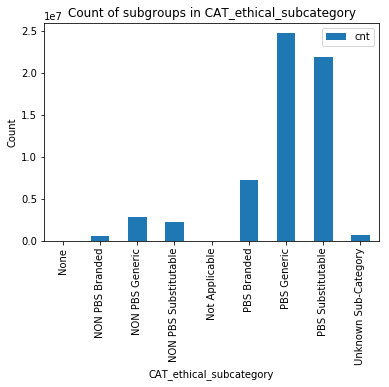

Requesting query... ok.
Query running...
Query done.
Processed: 1.4 Gb

Retrieving results...
Got 207 rows.

Total time taken 3.06 s.
Finished at 2017-04-26 17:17:19.


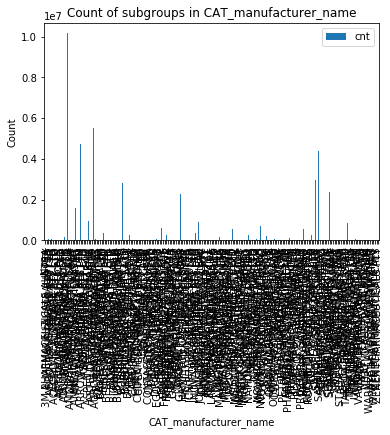

Requesting query... ok.
Query running...
Query done.
Processed: 236.8 Mb

Retrieving results...
Got 16 rows.

Total time taken 3.09 s.
Finished at 2017-04-26 17:17:26.


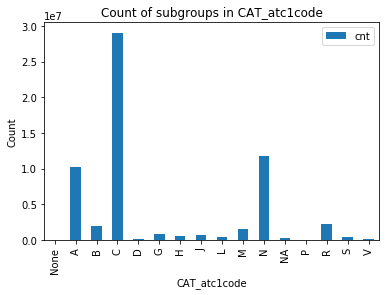

Requesting query... ok.
Query running...
Query done.
Processed: 428.0 Mb

Retrieving results...
Got 12 rows.

Total time taken 2.92 s.
Finished at 2017-04-26 17:17:31.


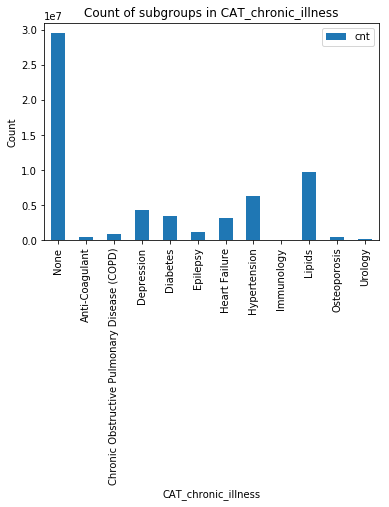

Requesting query... ok.
Query running...
Query done.
Processed: 238.9 Mb

Retrieving results...
Got 16 rows.

Total time taken 3.17 s.
Finished at 2017-04-26 17:17:36.


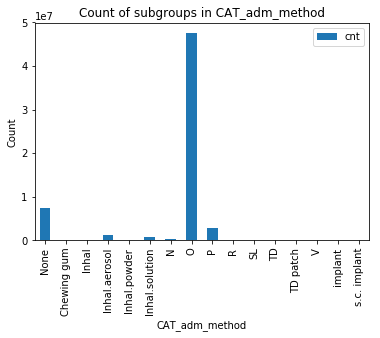

Requesting query... ok.
Query running...
Query done.
Processed: 349.3 Mb

Retrieving results...
Got 8 rows.

Total time taken 3.28 s.
Finished at 2017-04-26 17:17:41.


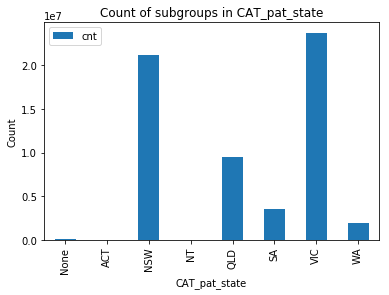

Requesting query... ok.
Query running...
Query done.
Processed: 347.8 Mb

Retrieving results...
Got 9 rows.

Total time taken 3.3 s.
Finished at 2017-04-26 17:17:46.


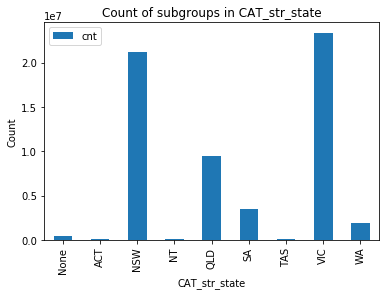

In [25]:
results =list()
for var in analyzed_vars:
    fig = plt.figure()
    if var[0:4] == 'CAT_':
        query = "SELECT " + var + """, COUNT(1) as cnt from dthon.transactions_enriched 
        GROUP BY """ + var + " ORDER BY " + var
        data = pd.read_gbq(query, project_id,dialect='standard')
        fig = plt.figure()
        p = data.plot(kind="bar", x = var, y= 'cnt')
        p.set_xlabel(var)
        p.set_ylabel('Count')
        p.set_title("Count of subgroups in " + var)
        plt.show(p)
        results.append(data)
    #else:
     #   query = "SELECT " + var + " from dthon.transactions_enriched where not is_duplicated"
     #   data = pd.read_gbq(query, project_id,dialect='standard')
     #   condition = [data[var] == 'null' | data[var] =='na']
     #   nulls_nas = sum(condition)
     #   #= sum([1 for obj in data[var] if obj == 'null' || obj.lower() == 'na'])
     #   filtered = data[!condition]
     #   results.append(pd.read_gbq(query, project_id,dialect='standard'))   

In [5]:
analyzed_vars[0][0:4]

'CAT_'

In [3]:
var = analyzed_vars[0]
query = "SELECT " + var + ", COUNT(1) as cnt from dthon.transactions_enriched GROUP BY " + var
data = pd.read_gbq(query, project_id,dialect='standard')

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 7 rows.

Total time taken 2.89 s.
Finished at 2017-04-26 00:38:25.


In [11]:
data[var]

0    A
1    C
2    P
3    Z
4    L
5    M
6    F
Name: CAT_source_system_code, dtype: object

In [3]:
query = """select store_id, dispense_year, sum(patient_price+ government_reclaim- wholesale_price)
from dthon.transactions_enriched
group by store_id, dispense_year"""
data = pd.read_gbq(query, project_id,dialect='standard')

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 17068 rows.

Total time taken 5.49 s.
Finished at 2017-04-26 18:35:49.


In [5]:
data_2015 = data[data['dispense_year'] == 2015]

In [33]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data_2015['f0_'], bins = 10)


ValueError: max must be larger than min in range parameter.

In [12]:
condition = data_2015['f0_']==min(data_2015['f0_'])
data_2015 = data_2015[data_2015['f0_']>min(data_2015['f0_'])]


In [42]:
data2 = [go.Histogram(x=data_2015['f0_'])]
py.iplot(data2, filename='basic histogram')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mike_kras/0 or inside your plot.ly account where it is named 'basic histogram'


In [51]:
200k
100k
60k
30k
5000
0

In [17]:
data_2015 = data_2015[data_2015['f0_'] < 100000]
data_2015['f0_'].iplot(kind='histogram', barmode='stack', bins=200)

To do:
add pharmacy category
200k
100k
60k
30k
5000
0

violin plot  (+ stacked horizontal barplot) in both pharmacy category is on y:
drugs for chronic illnesses +non chronic as other sold split per illness as percentage of all transactions
manufacturing group as percentage of all transactions
atc1code %
ethical sub%
top 10 brand + others %
state

sales per month for different groups - line chart